<a href="https://colab.research.google.com/github/lro99/stock_sentiment/blob/main/SentimentTrading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install hf_xet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 MB 9.6 MB/s eta 0:00:00


In [2]:
pip install newsapi-python

In [27]:
pip install finnhub-python

In [3]:
apikey = '62638dc7df5e4e958183e238948a0ebf'

In [24]:
finhubkey = 'd06ltdpr01qg26s8pi6gd06ltdpr01qg26s8pi70'

In [28]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# finBERT
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline
# newsapi
from newsapi import NewsApiClient
import requests
import finnhub

In [5]:
# get list of news
news = yf.Search("sp500", news_count=10).news
for i in news:
  print(i['title'])

Nvidia stock slides, Apple gets a warning, and Tesla short-sellers cash in: Markets news roundup
Trump 'wasn't worried' about the bond market tsunami
BofA says the latest stock rally will be short-lived — and 3 things need to happen for gains to continue
5 stock-market signals that suggest the tariff-induced sell-off is over
The S&P 500 ends the week up 4% even as hopes for a quick trade war truce fade
Investing Action Plan: Apple, Amazon, Pfizer, Caterpillar And Sparring With The Fed
Tariffs Job Cuts Are Coming. Watch the Shipping, Retail Industries.
Dow Jones Falls Ahead Of Inflation Survey; Google Surges On Earnings
Stocks Trigger '100% Accurate' Bullish Signal After 3-Day Rally
Construction Stock Argan Builds New Base; Nears Entry As Profits Surge 196%


In [39]:
# S&P500 yahoo

ticker = yf.Ticker("SPY")
historical = ticker.history(period="5y")
historical

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2020-04-27 00:00:00-04:00,265.098721,268.027521,264.633831,266.893188,77896600,0.0,0.0,0.0
2020-04-28 00:00:00-04:00,270.584375,270.937696,265.359020,265.665863,105270000,0.0,0.0,0.0
2020-04-29 00:00:00-04:00,271.058583,274.173350,270.017235,272.620605,118745600,0.0,0.0,0.0
2020-04-30 00:00:00-04:00,271.225824,272.722783,268.324918,270.082214,122901700,0.0,0.0,0.0
2020-05-01 00:00:00-04:00,265.275315,270.249640,261.751444,262.932281,125180000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2025-04-21 00:00:00-04:00,521.159973,521.700012,508.459991,513.880005,69368100,0.0,0.0,0.0
2025-04-22 00:00:00-04:00,520.140015,529.299988,519.190002,527.250000,75948100,0.0,0.0,0.0
2025-04-23 00:00:00-04:00,540.429993,545.429993,533.880005,535.419983,90590700,0.0,0.0,0.0


In [40]:
twohun = historical['Open'].count()
twoavg = historical['Close'][twohun-200:].mean()
twoavg

np.float64(570.0947613525391)

In [41]:
# percent change col

historical['Change'] = (historical['Close'] - historical['Close'].shift(1))/historical['Close'].shift(1) * 100
historical

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Change
Date,,,,,,,,,
2020-04-27 00:00:00-04:00,265.098721,268.027521,264.633831,266.893188,77896600,0.0,0.0,0.0,NaN
2020-04-28 00:00:00-04:00,270.584375,270.937696,265.359020,265.665863,105270000,0.0,0.0,0.0,-0.459856
2020-04-29 00:00:00-04:00,271.058583,274.173350,270.017235,272.620605,118745600,0.0,0.0,0.0,2.617853
2020-04-30 00:00:00-04:00,271.225824,272.722783,268.324918,270.082214,122901700,0.0,0.0,0.0,-0.931108
2020-05-01 00:00:00-04:00,265.275315,270.249640,261.751444,262.932281,125180000,0.0,0.0,0.0,-2.647317
...,...,...,...,...,...,...,...,...,...
2025-04-21 00:00:00-04:00,521.159973,521.700012,508.459991,513.880005,69368100,0.0,0.0,0.0,-2.380268
2025-04-22 00:00:00-04:00,520.140015,529.299988,519.190002,527.250000,75948100,0.0,0.0,0.0,2.601774
2025-04-23 00:00:00-04:00,540.429993,545.429993,533.880005,535.419983,90590700,0.0,0.0,0.0,1.549546


In [9]:
# finBERT model
tokenizer = BertTokenizer.from_pretrained("ProsusAI/finbert")
model = BertForSequenceClassification.from_pretrained("ProsusAI/finbert")

finbert = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

headline = news[9]['title']
res = finbert(headline)
print(res)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Device set to use cpu


[{'label': 'positive', 'score': 0.9425774216651917}]


In [11]:
for i in news:
  headline = i['title']
  res = finbert(headline)
  print(headline, res)

Nvidia stock slides, Apple gets a warning, and Tesla short-sellers cash in: Markets news roundup [{'label': 'neutral', 'score': 0.7527286410331726}]
Trump 'wasn't worried' about the bond market tsunami [{'label': 'neutral', 'score': 0.6628807783126831}]
BofA says the latest stock rally will be short-lived — and 3 things need to happen for gains to continue [{'label': 'neutral', 'score': 0.3722414970397949}]
5 stock-market signals that suggest the tariff-induced sell-off is over [{'label': 'negative', 'score': 0.86110520362854}]
The S&P 500 ends the week up 4% even as hopes for a quick trade war truce fade [{'label': 'positive', 'score': 0.8678718209266663}]
Investing Action Plan: Apple, Amazon, Pfizer, Caterpillar And Sparring With The Fed [{'label': 'neutral', 'score': 0.85906583070755}]
Tariffs Job Cuts Are Coming. Watch the Shipping, Retail Industries. [{'label': 'neutral', 'score': 0.8071346879005432}]
Dow Jones Falls Ahead Of Inflation Survey; Google Surges On Earnings [{'label': 

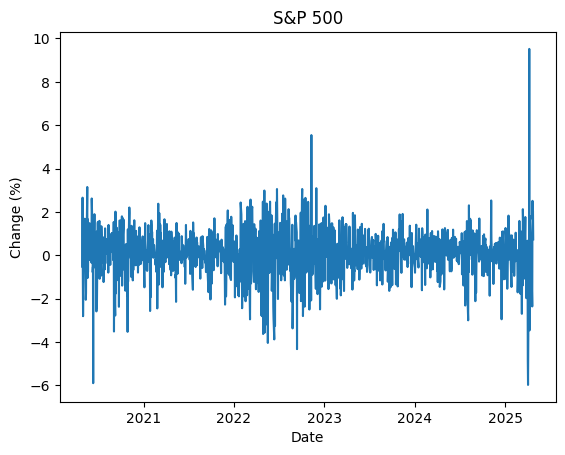

In [12]:
# graphing % change
historical = historical.reset_index()
X = pd.to_datetime(historical['Date'])
y = historical['Change']

plt.plot(X, y)
plt.title('S&P 500')
plt.xlabel('Date')
plt.ylabel('Change (%)')
plt.show()


In [13]:
# EDA

historical.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Change
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03,1257.0,1257.0,1256.000000
mean,4432.401832,4458.345640,4404.779432,4433.177249,4.361576e+09,0.0,0.0,0.058304
std,772.564968,773.399615,770.813546,772.290802,9.780717e+08,0.0,0.0,1.129445
min,2794.540039,2844.239990,2766.639893,2820.000000,1.639500e+09,0.0,0.0,-5.974961
25%,3919.419922,3954.330078,3900.429932,3923.679932,3.776100e+09,0.0,0.0,-0.507433
50%,4334.229980,4364.200195,4302.700195,4335.660156,4.152250e+09,0.0,0.0,0.089549
75%,4861.109863,4898.149902,4844.370117,4864.600098,4.705850e+09,0.0,0.0,0.712420
max,6134.500000,6147.430176,6111.149902,6144.149902,9.976520e+09,0.0,0.0,9.515388


# NewsAPI

In [14]:
newsapi = NewsApiClient(api_key=apikey)

top_headlines = newsapi.get_top_headlines(q='market',
                                          category='business',
                                          language='en',
                                          country='us')

In [15]:
top_headlines

{'status': 'ok',
 'totalResults': 2,
 'articles': [{'source': {'id': 'associated-press',
    'name': 'Associated Press'},
   'author': 'Elaine Kurtenbach',
   'title': 'Automakers focus on the global market, chide the US over tariffs at Shanghai’s auto show - AP News',
   'description': "Booths of big Chinese, German and Japanese automakers are bustling at Shanghai's auto show as the industry keeps its sights on the wider global market not subject to steep U.S. tariffs on imports of cars and auto parts. U.S. President Donald Trump's 25% tarif…",
   'url': 'https://apnews.com/article/china-auto-tariffs-trump-evs-397bc37d5412bb6c0aa1426665c3779b',
   'urlToImage': 'https://dims.apnews.com/dims4/default/e2078d9/2147483647/strip/true/crop/8640x4860+0+450/resize/1440x810!/quality/90/?url=https%3A%2F%2Fassets.apnews.com%2Ff4%2F3a%2Fd0a3e5d7bb6c8ef35211551b2918%2F6c48056edfa042bbb14fb987402d8ac4',
   'publishedAt': '2025-04-25T02:05:00Z',
   'content': 'SHANGHAI (AP) Booths of big Chinese, Ge

In [16]:
# top headlines

country = 'us'
category = 'business'

url = f"https://newsapi.org/v2/top-headlines?country={country}&category={category}&apiKey={apikey}"

url = 'https://newsapi.org/v2/top-headlines?country=us&apiKey=API_KEY'

response = requests.get(url)
data = response.json()

In [17]:
data

{'status': 'ok',
 'totalResults': 51,
 'articles': [{'source': {'id': 'the-washington-post',
    'name': 'The Washington Post'},
   'author': 'Abha Bhattarai, Scott Clement, Emily Guskin',
   'title': 'Most Americans disapprove of Trump on tariffs, Post-ABC-Ipsos poll finds - The Washington Post',
   'description': 'Most Americans say they disapprove of Trump’s tariff policies and worry about inflation, a new Post-ABC-Ipsos poll finds.',
   'url': 'https://www.washingtonpost.com/business/2025/04/25/trump-tariffs-poll-approval/',
   'urlToImage': 'https://www.washingtonpost.com/wp-apps/imrs.php?src=https://arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/HNV3SXTQW3BLM334EYFC4Y4WPQ.jpg&w=1440',
   'publishedAt': '2025-04-25T20:31:20Z',
   'content': 'Nearly 2 out of 3 Americans disapprove of President Donald Trumps handling of tariffs, a rebuke of the administrations flagship economic policy, according to a Washington Post-ABC News-Ipsos national… [+4544 chars]'},
  {'source

In [18]:
# cleaning news

results = []
for article in data['articles']:
  headline = article['title']
  description = article['description']
  date = article['publishedAt']
  if description is None:   # error catch for when article has no description
    continue
  res = finbert(description)

  if res[0]['label'] == 'neutral':
    continue
  results.append([headline, description, date, res[0]['label'], res[0]['score']])

In [19]:
for line in results:
  print(line[0], '--- ',line[2], '---', line[3], '---', line[4])

Most Americans disapprove of Trump on tariffs, Post-ABC-Ipsos poll finds - The Washington Post ---  2025-04-25T20:31:20Z --- negative --- 0.9490642547607422
S&P 500 closes higher for a fourth day in a row, notches 4% gain for the week - CNBC ---  2025-04-25T20:22:00Z --- positive --- 0.7913806438446045
Trump Trade War Update: Shipping Cancellations Could Rival 'Those Of The Pandemic' - Investor's Business Daily ---  2025-04-25T20:06:00Z --- negative --- 0.6287466883659363
Why Tesla’s stock is having such a great week - Yahoo Finance ---  2025-04-25T17:23:48Z --- positive --- 0.8438291549682617
China quietly exempts some U.S.-made semiconductors from tariffs - The Washington Post ---  2025-04-25T17:20:44Z --- negative --- 0.9222277998924255
Apple to Shift All US iPhone Assembly to India Amid Tariff Turmoil, Report Says - CNET ---  2025-04-25T17:16:00Z --- positive --- 0.9393761157989502
SEPTA kicks off new fare evasion enforcement blitz at Huntingdon Station in Philadelphia's Kensington

In [20]:
pcount = 0
psum = 0

ncount = 0
nsum = 0

for line in results:
  if line[3] == 'negative':
    ncount += 1
    nsum += float(line[4])
  else:
    pcount += 1
    psum += float(line[4])

print('positive:', pcount, 'negative:', ncount)
print('positive average:', psum/pcount)
print('negative average:', nsum/ncount)



positive: 4 negative: 5
positive average: 0.8809433132410049
negative average: 0.8590507745742798


# Finnhub API

In [45]:
# finnhub news api. allows for historical search

finnhub_client = finnhub.Client(api_key=finhubkey)

news = finnhub_client.company_news('SPY', _from="2025-04-01", to="2025-04-01")

# for i in news:
#   print(i['headline'])
for i in news:
  if i['summary'] == None:
    continue
  print(i['summary'], finbert(i['summary']))

Stocks ended mostly higher today, though not in any inspiring fashion - more like the way a snake clears a hurdle. [{'label': 'positive', 'score': 0.8160881996154785}]
Q1 2025 ended negatively for SPY and VYM, but my watchlist outperformed. Check out the April 2025 watchlist that includes ten stocks. [{'label': 'neutral', 'score': 0.7085716724395752}]
Expectations are building for a Fed interest rate cut. [{'label': 'positive', 'score': 0.7386780977249146}]
 [{'label': 'neutral', 'score': 0.4241849184036255}]
Available forecasts do not consistently point to extreme scenarios that would justify a crisis-level decline in the S&P 500. Read what investors need to know. [{'label': 'neutral', 'score': 0.48162582516670227}]
In the most recent CFO Survey, we explored the extent to which firms' inputs/supplies are imported from countries facing recently imposed tariffs and how... [{'label': 'neutral', 'score': 0.9022637605667114}]
The S&P 500 and Nasdaq indices have breached March lows, while t